In [1]:
from matplotlib import pyplot as plt
from IPython.display import display, Markdown

from data import HRFDataset, DataLoaderFactory, DatasetLoader
from classify import ClassifierFactory, ImageProcessingClassifier, ImageProcessingClassifierTurboExtra, KnnClassifier

In [2]:
dataset = HRFDataset()
dataset_loader = DatasetLoader(dataset, seed=0, validation_size=1)

In [3]:
def show_result(result):
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))
    ax1.set_title("Input image")
    ax1.imshow(result.input_image)
    ax2.set_title("Expected result")
    ax2.imshow(result.expected_result, cmap="gray")
    ax3.set_title("Actual result")
    ax3.imshow(result.actual_result, cmap="gray")
    ax4.set_title("Error matrix")
    ax4.imshow(result.error_matrix)
    plt.show()
    
    for key, value in result.data:
        display(Markdown(f"**{key}**: {value}"))
        

def run_classifier(name, raw_image_loader_kwargs=None, image_loader_kwargs=None, 
                   mask_loader_kwargs=None, load=False):
    
    raw_image_loader = DataLoaderFactory.create_data_loader(**raw_image_loader_kwargs)
    image_loader = DataLoaderFactory.create_data_loader(**image_loader_kwargs)
    mask_loader = DataLoaderFactory.create_data_loader(**mask_loader_kwargs)
    
    generators = dataset_loader.load_training(image_loader, mask_loader)
    classifier = ClassifierFactory.create_classifier(name, load, *generators)
    
    for data in dataset_loader.load_validation(raw_image_loader, image_loader, mask_loader):
        result = classifier.classify(*data)
        show_result(result)

Classify...


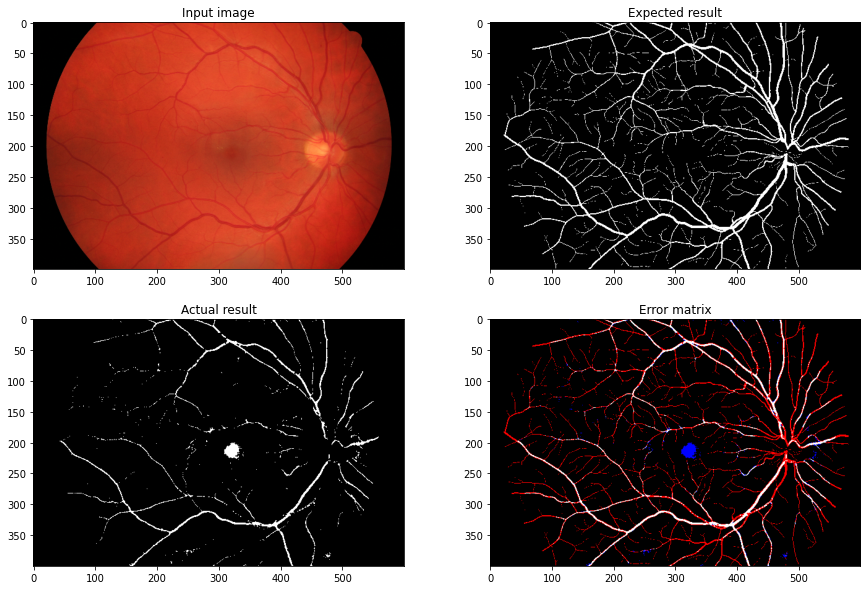

**Name**: 11_dr

**Duration**: 0.9 s

**True positive**: 6399

**False positive**: 13676

**False negative**: 1119

**True negative**: 218806

**Accuracy**: 93.8%

**Sensitivity**: 85.1%

**Specificity**: 94.1%

In [4]:
common_kwargs = dict(size=(600, 400))
raw_image_loader_kwargs = common_kwargs
image_loader_kwargs = dict(**common_kwargs)
mask_loader_kwargs = dict(binarize=True, **common_kwargs)

run_classifier(ImageProcessingClassifier, raw_image_loader_kwargs, 
               image_loader_kwargs, mask_loader_kwargs, load=False)

Classify...


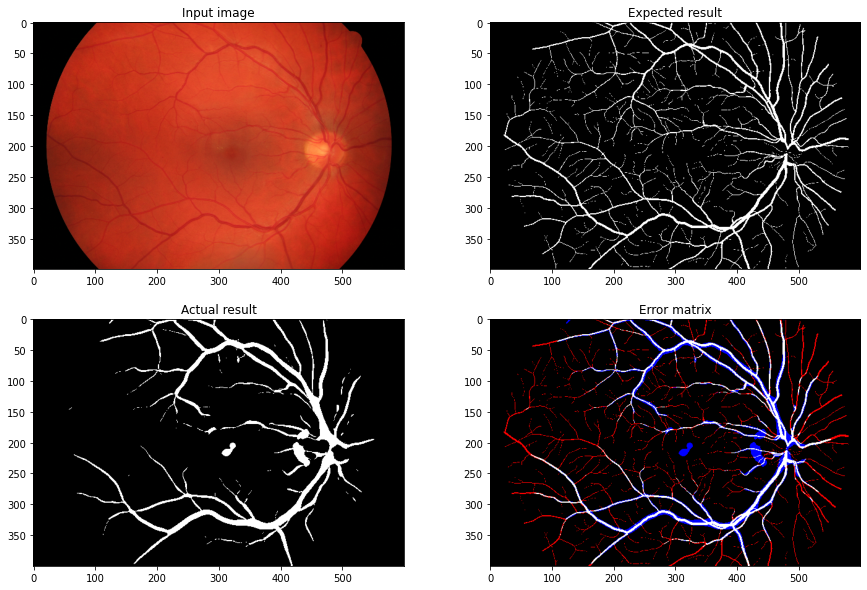

**Name**: 11_dr

**Duration**: 1.7 s

**True positive**: 10932

**False positive**: 9143

**False negative**: 7487

**True negative**: 212438

**Accuracy**: 93.1%

**Sensitivity**: 59.4%

**Specificity**: 95.9%

In [5]:
common_kwargs = dict(size=(600, 400))
raw_image_loader_kwargs = common_kwargs
image_loader_kwargs = dict(**common_kwargs)
mask_loader_kwargs = dict(binarize=True, **common_kwargs)

run_classifier(ImageProcessingClassifierTurboExtra, raw_image_loader_kwargs, 
               image_loader_kwargs, mask_loader_kwargs, load=False)

In [6]:
common_kwargs = dict(size=(600, 400))
raw_image_loader_kwargs = common_kwargs
image_loader_kwargs = dict(as_gray=True, **common_kwargs)
mask_loader_kwargs = dict(binarize=True, **common_kwargs)

run_classifier(KnnClassifier, raw_image_loader_kwargs, image_loader_kwargs, mask_loader_kwargs, 
               load=True)

TypeError: run_classifier() got an unexpected keyword argument 'patch_size'